In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_csv("Plant_disease.csv")
# df=df.drop(["disease_present"],axis=1)
#Scaling the data
print(df.describe())
scaler=StandardScaler()

        temperature      humidity      rainfall       soil_pH        Target
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean      25.612191     62.119300      9.807522      6.245855      0.241000
std        5.813841     22.679977      9.852130      1.302465      0.427712
min        5.387999      6.244209      0.000055      4.000075      0.000000
25%       21.815610     40.772925      2.812822      5.122970      0.000000
50%       25.293238     72.211752      6.864898      6.232188      0.000000
75%       28.916048     81.032999     13.442871      7.386377      0.000000
max       56.686495    102.395421     84.654161      8.499875      1.000000


In [3]:
splt=StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)
for train_idx,test_idx in splt.split(df,df["Target"]):
    train_set=df.loc[train_idx]
    test_set=df.loc[test_idx]

In [4]:
#Training data
train_feature=train_set.drop("Target",axis=1)
train_label=train_set["Target"]
train_feature=scaler.fit_transform(train_feature)
#Testing data
test_feature=test_set.drop("Target",axis=1)
test_feature=scaler.fit_transform(test_feature)
test_label=test_set["Target"]

[[-0.68799544 -0.45676029 -0.9573321  -0.89698691]
 [ 0.9283757   1.6716684  -0.39883073 -1.33530472]
 [ 0.17777676 -1.10754917  2.58623657 -0.88049667]
 ...
 [ 0.05585616 -1.02865817 -0.49860398  1.17936985]
 [ 0.20544674 -0.84629463 -0.96982546 -1.28161502]
 [ 0.99536756  1.00061279 -0.87212771  1.71095867]]


In [62]:
#model=LogisticRegression(C=0.001,solver="liblinear",penalty="l1",max_iter=5000)
#model=RandomForestClassifier()
#model=SVC()
model=DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth= 10, min_samples_leaf=30,min_samples_split=25,min_impurity_decrease=0)
#model=GradientBoostingClassifier()
#model=BaggingClassifier()
model.fit(train_feature,train_label)
prediction=model.predict(test_feature)
acc=accuracy_score(prediction,test_label)
print(model.get_params)
print(acc)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       min_impurity_decrease=0, min_samples_leaf=30,
                       min_samples_split=25)>
0.862


In [37]:
parameter={"max_depth":[5,8,10],"min_samples_split":[5,10],"criterion":["entropy"],"ccp_alpha":[0.1,0.01],"min_samples_leaf":[5,10]}
gs=GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring="accuracy")
gs.fit(train_feature,train_label)
print("best_parameter:",gs.best_params_)
print("best_score:",gs.best_score_)

best_parameter: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score: 0.8379999999999999


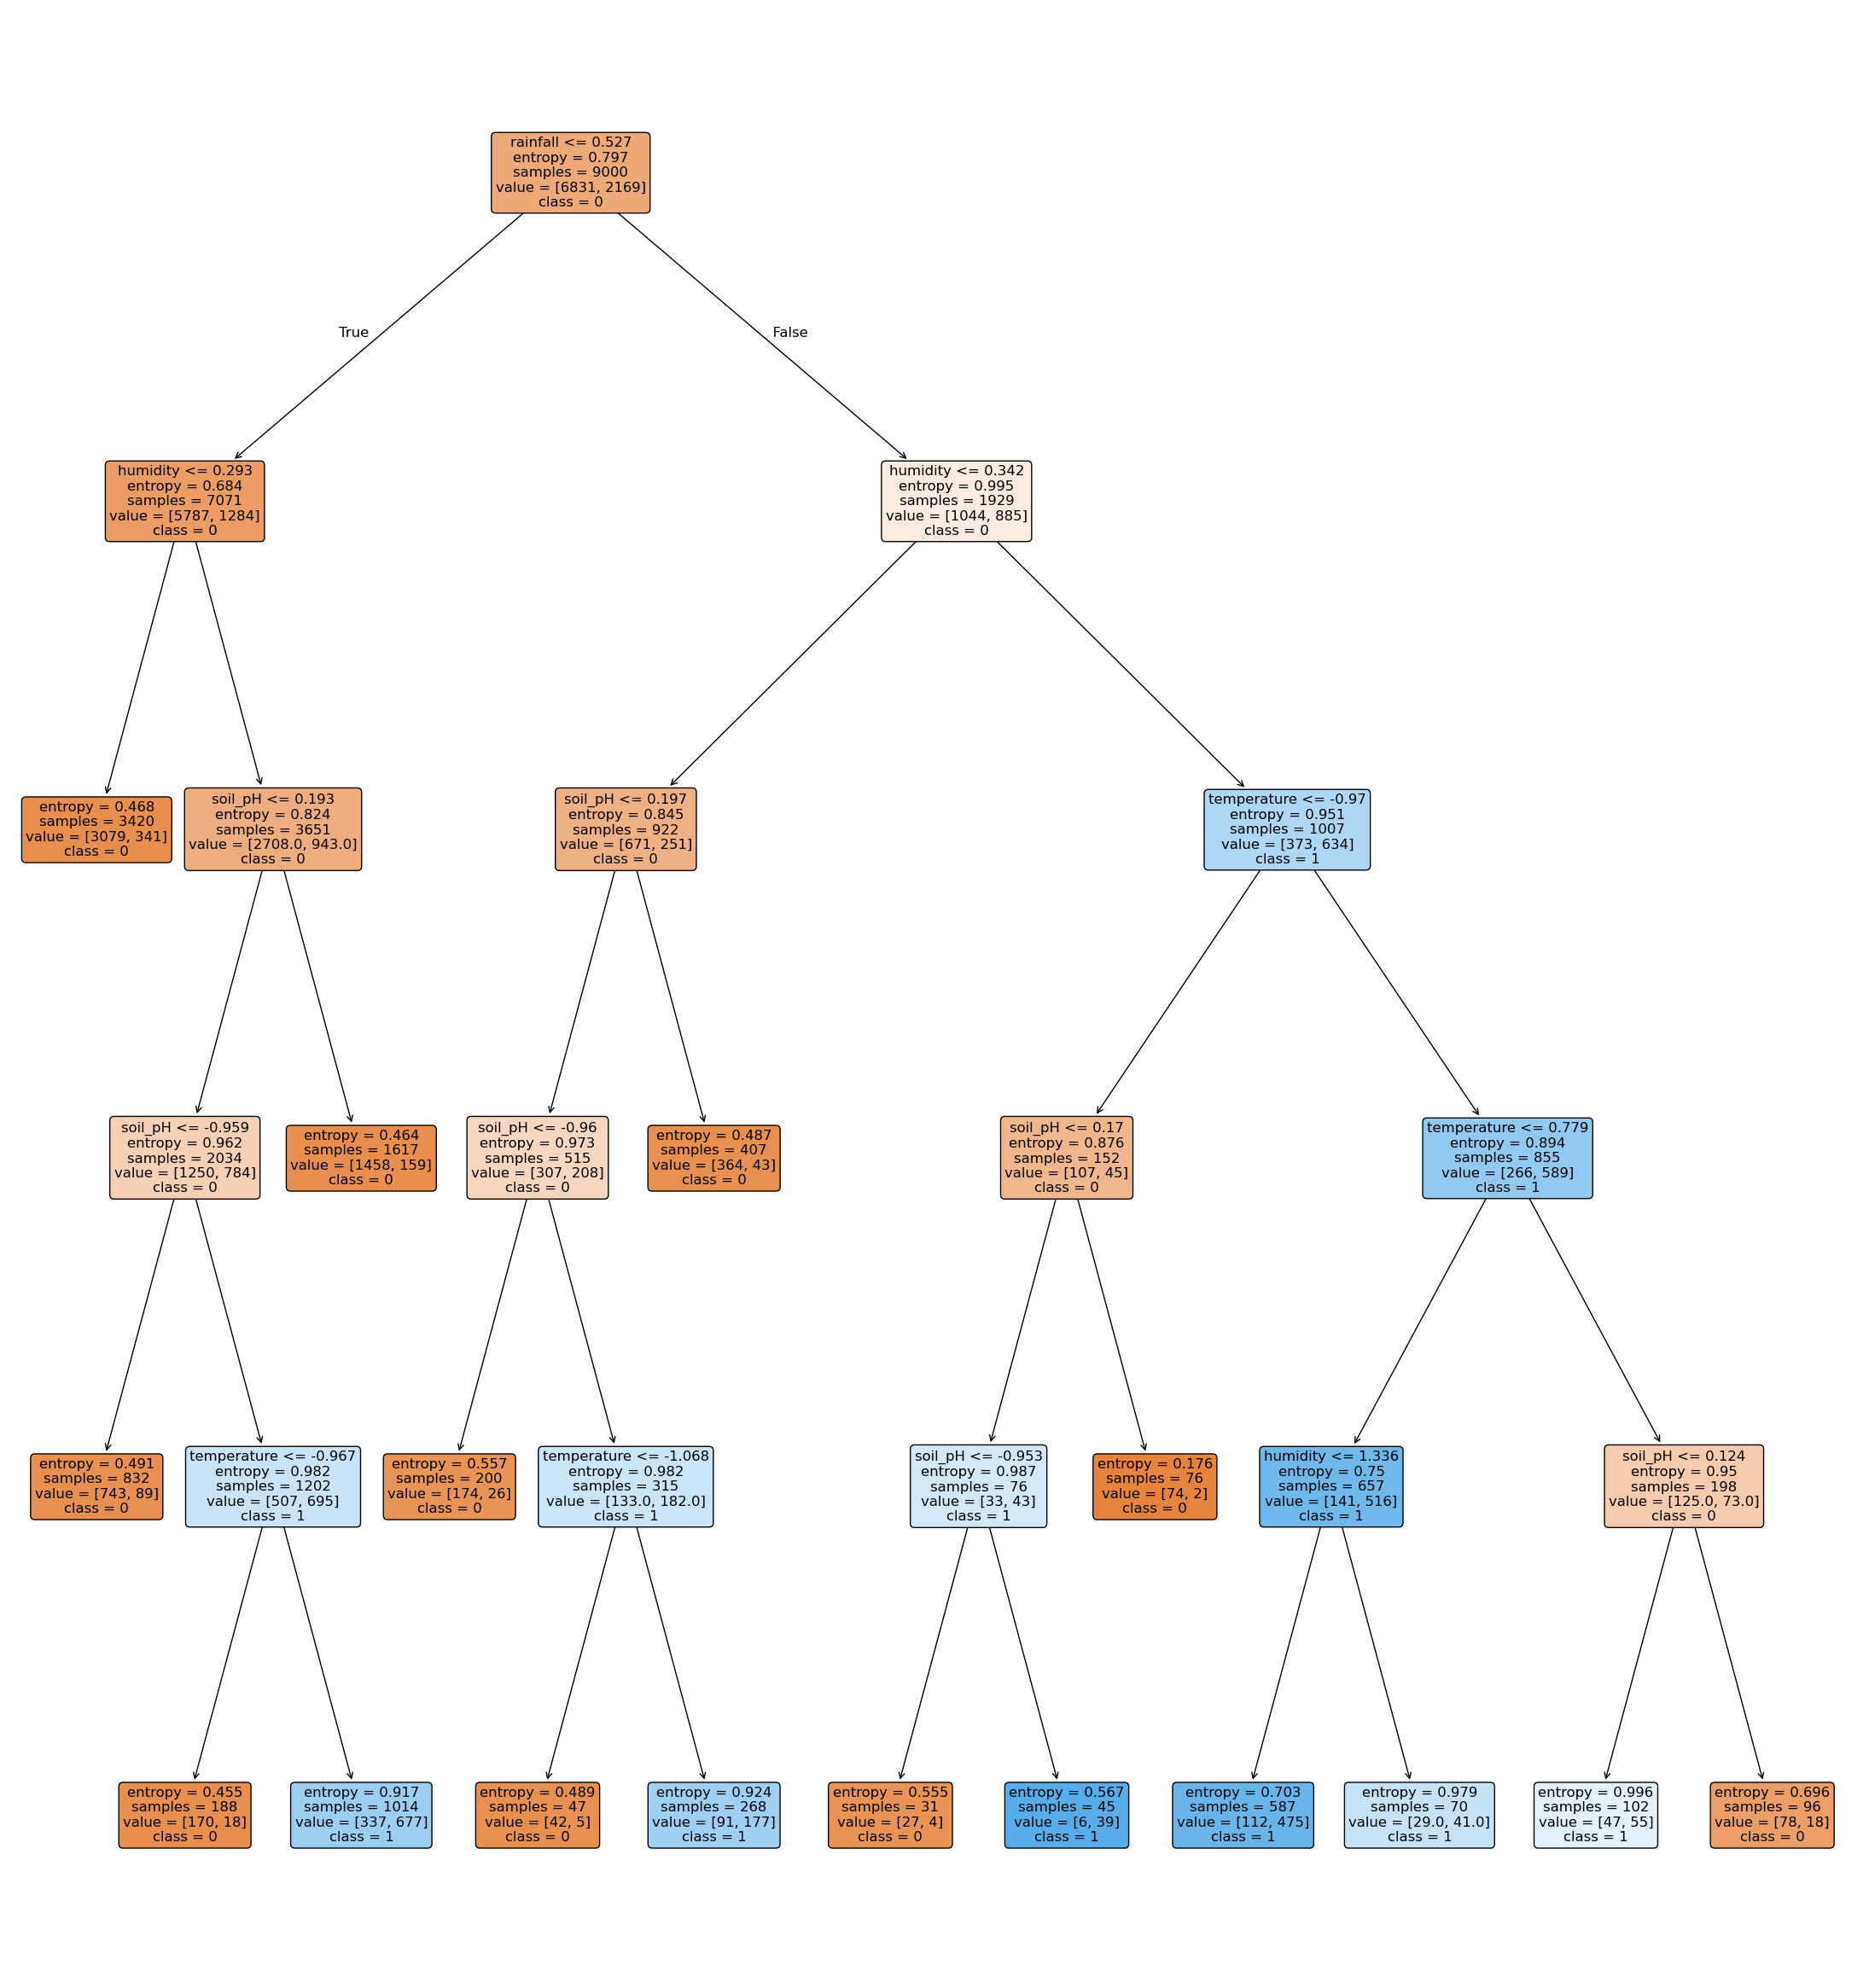

In [61]:
#plotting the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(28,30))
plot_tree(model,filled=True,feature_names=["temperature","humidity","rainfall","soil_pH"],class_names=["0","1"],rounded=True)
plt.show()

In [23]:
#Accuracy
acc=accuracy_score(prediction,test_label)
print(acc)

0.826


User Interface

In [63]:
import joblib
joblib.dump(model,"ABCD.pkl")
loaded_model = joblib.load("ABCD.pkl")
l1=[30.7,34.34,65.4,2.32]
feature=np.array(l1).reshape(1,-1)
result=loaded_model.predict(feature)
print(result)

[0]
